In [1]:
import scanpy as sc
import pandas as pd
from pathlib import Path

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

DPI = 300
FONTSIZE = 20  # 42

from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42

In [2]:
FIG2SAVE = Path("/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/final_object/figures/forpaper/Similarity_JaccardIndex/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)

In [3]:
pop_tme = "Epithelial" # cell type to compare

In [4]:
pval_thresh = 0.05
log2fc_thresh = 1

In [5]:
p_deg = Path("/data/BCI-CRC/SO/data/CRC_multiome/ArchR_final_analysis/DEGs/primaryEpithelial_DEGs_seurat_wilcoxon.xlsx")
m_deg = Path("/data/BCI-CRC/SO/data/CRC_multiome/ArchR_final_analysis/DEGs/DEGs_seurat_wilcoxon.xlsx")
p_deg_dict = pd.read_excel(p_deg, sheet_name=None)

m_deg_dict = pd.read_excel(m_deg, sheet_name=None)

In [6]:
for k in p_deg_dict.keys():
    p_deg_dict[k] = p_deg_dict[k][(p_deg_dict[k]['p_val_adj'] < pval_thresh) & (
        p_deg_dict[k]['avg_log2FC'] > log2fc_thresh)]
    p_deg_dict[k] = p_deg_dict[k].sort_values("avg_log2FC", ascending=False)
    
for k in m_deg_dict.keys():
    m_deg_dict[k] = m_deg_dict[k][(m_deg_dict[k]['p_val_adj'] < pval_thresh) & (
        m_deg_dict[k]['avg_log2FC'] > log2fc_thresh)]
    m_deg_dict[k] = m_deg_dict[k].sort_values("avg_log2FC", ascending=False)

In [9]:
p_deg_dict['Stem NOTUM'] = p_deg_dict['Stem (NOTUM high)']
del(p_deg_dict['Stem (NOTUM high)'])
p_deg_dict['iREC'] = p_deg_dict['ipEMT']
del(p_deg_dict['ipEMT'])
p_deg_dict['REC'] = p_deg_dict['pEMT']
del(p_deg_dict['pEMT'])

In [10]:
m_deg_dict['Stem NOTUM'] = m_deg_dict['Stem (NOTUM high)']
del(m_deg_dict['Stem (NOTUM high)'])
m_deg_dict['iREC'] = m_deg_dict['ipEMT']
del(m_deg_dict['ipEMT'])
m_deg_dict['REC'] = m_deg_dict['pEMT']
del(m_deg_dict['pEMT'])

In [20]:
m_deg_dict['iREC'].head(5)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene,pct.diff
0,1.008819e-127,2.922681,0.510,0.139,3.680677e-123,ipEMT,EMP1,0.371
1,3.556775e-110,2.376267,0.672,0.279,1.297689e-105,ipEMT,LAMA3,0.393
2,2.911477e-130,2.031197,0.652,0.233,1.062252e-125,ipEMT,IFI6,0.419
3,3.283309e-130,2.000204,0.678,0.251,1.197915e-125,ipEMT,AC020916.1,0.427
4,9.430250e-173,1.901332,0.443,0.082,3.440627e-168,ipEMT,SERPINB5,0.361


# Use jaccard index to assess how similar TME populations are in pCRC and mCRC

To investigate if some TME populations were actually shared by both tumour sites, we appliedthe pair-wised Jaccard index calculated as follows, where A and B represent two TME subpopulations.

 Jaccard index = A⋂B/A⋃B
 
 Jaccard Similarity also known as Jaccard index, is a statistic to measure the similarity between two data sets. It is measured as the size of the intersection of two sets divided by the size of their union.

Where:

    |A \cap B| is the cardinality (size) of the intersection of sets A and B.
    |A\cup B| is the cardinality (size) of the union of sets A and B.

Jaccard Similarity is also known as the Jaccard index or Jaccard coefficient, its values lie between 0 and 1. where 0 means no similarity and the values get closer to 1 means increasing similarity 1 means the same datasets.

1. compute DE genes and compute intersection and union

In [11]:
p_deg_dict.keys()

dict_keys(['HLA high', 'Stem', 'Colonocyte', 'Intermediate', 'TA2', 'Hypoxia', 'UPR', 'Tuft', 'TA1', 'Goblet', 'Enteroendocrine', 'Stem NOTUM', 'iREC', 'REC'])

In [12]:
m_deg_dict.keys()

dict_keys(['TA1', 'Hypoxia', 'Intermediate', 'UPR', 'TA2', 'Colonocyte', 'Stem', 'Tuft', 'Goblet', 'Enteroendocrine', 'Stem NOTUM', 'iREC', 'REC'])

In [13]:
# create a dataframe with rows from primary and cols from met
jacc_idx_df = pd.DataFrame(index=list(p_deg_dict.keys()),
                           columns=list(m_deg_dict.keys()),
                           dtype=float
                          )
jacc_idx_df

,TA1,Hypoxia,Intermediate,UPR,TA2,Colonocyte,Stem,Tuft,Goblet,Enteroendocrine,Stem NOTUM,iREC,REC
HLA high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colonocyte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Intermediate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TA2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hypoxia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UPR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tuft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TA1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goblet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# compute jaccard index for a pair
def jaccard_index(a, b):
    nb_obs_intersection = len(set(a).intersection(set(b)))
    nb_obs_union = len(set(a).union(set(b)))
    
    return  nb_obs_intersection/nb_obs_union

In [15]:
a = [1, 2, 4, 5, 6]
b = [1, 2, 3, 7, 8]

jaccard_index(a, b)

0.25

In [16]:
a = ["Lion" , "Tiger" , "Cheetah" , "Leopard" , "Rhino"]
b = ["Lion" , "Monkey" , "Cheetah" , "Cat" , "Dog"]

jaccard_index(a, b)

0.25

In [17]:

a = {1,2,3,4,6}
b = {1,2,5,8,9}
jaccard_index(a, b)

0.25

In [54]:
# how many genes to consider? 
genes2consider = 5
# compute jaccard index
for p in jacc_idx_df.index:
    for m in jacc_idx_df.columns:
        jacc_idx_df.loc[p,m] = jaccard_index(a=p_deg_dict[p]['gene'][:genes2consider],
                                             b=m_deg_dict[m]['gene'][:genes2consider])

In [55]:
jacc_idx_df

,TA1,Hypoxia,Intermediate,UPR,TA2,Colonocyte,Stem,Tuft,Goblet,Enteroendocrine,Stem NOTUM,iREC,REC
HLA high,0.0,0.000,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.0
Stem,0.0,0.000,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.0
Colonocyte,0.0,0.125,0.0,0.0,0.0,0.111111,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.0
Intermediate,0.0,0.000,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.0
TA2,0.0,0.000,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.0
Hypoxia,0.0,0.000,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.0
UPR,0.0,0.000,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.0
Tuft,0.0,0.000,0.0,0.0,0.0,0.000000,0.00,0.111111,0.000000,0.0,0.000000,0.0,0.0
TA1,0.0,0.000,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.0
Goblet,0.0,0.000,0.0,0.0,0.0,0.000000,0.00,0.000000,0.111111,0.0,0.000000,0.0,0.0


There are many advantages of using Jaccard Similarity:

   * It is simple to calculate.
   * It is unaffected by the size of dataset.
   * It is a reliable option for determining similarity when the sets are of various sizes.
   * It may be used to compare the similarity of any kind of data, including time series data, photos, text, and images.

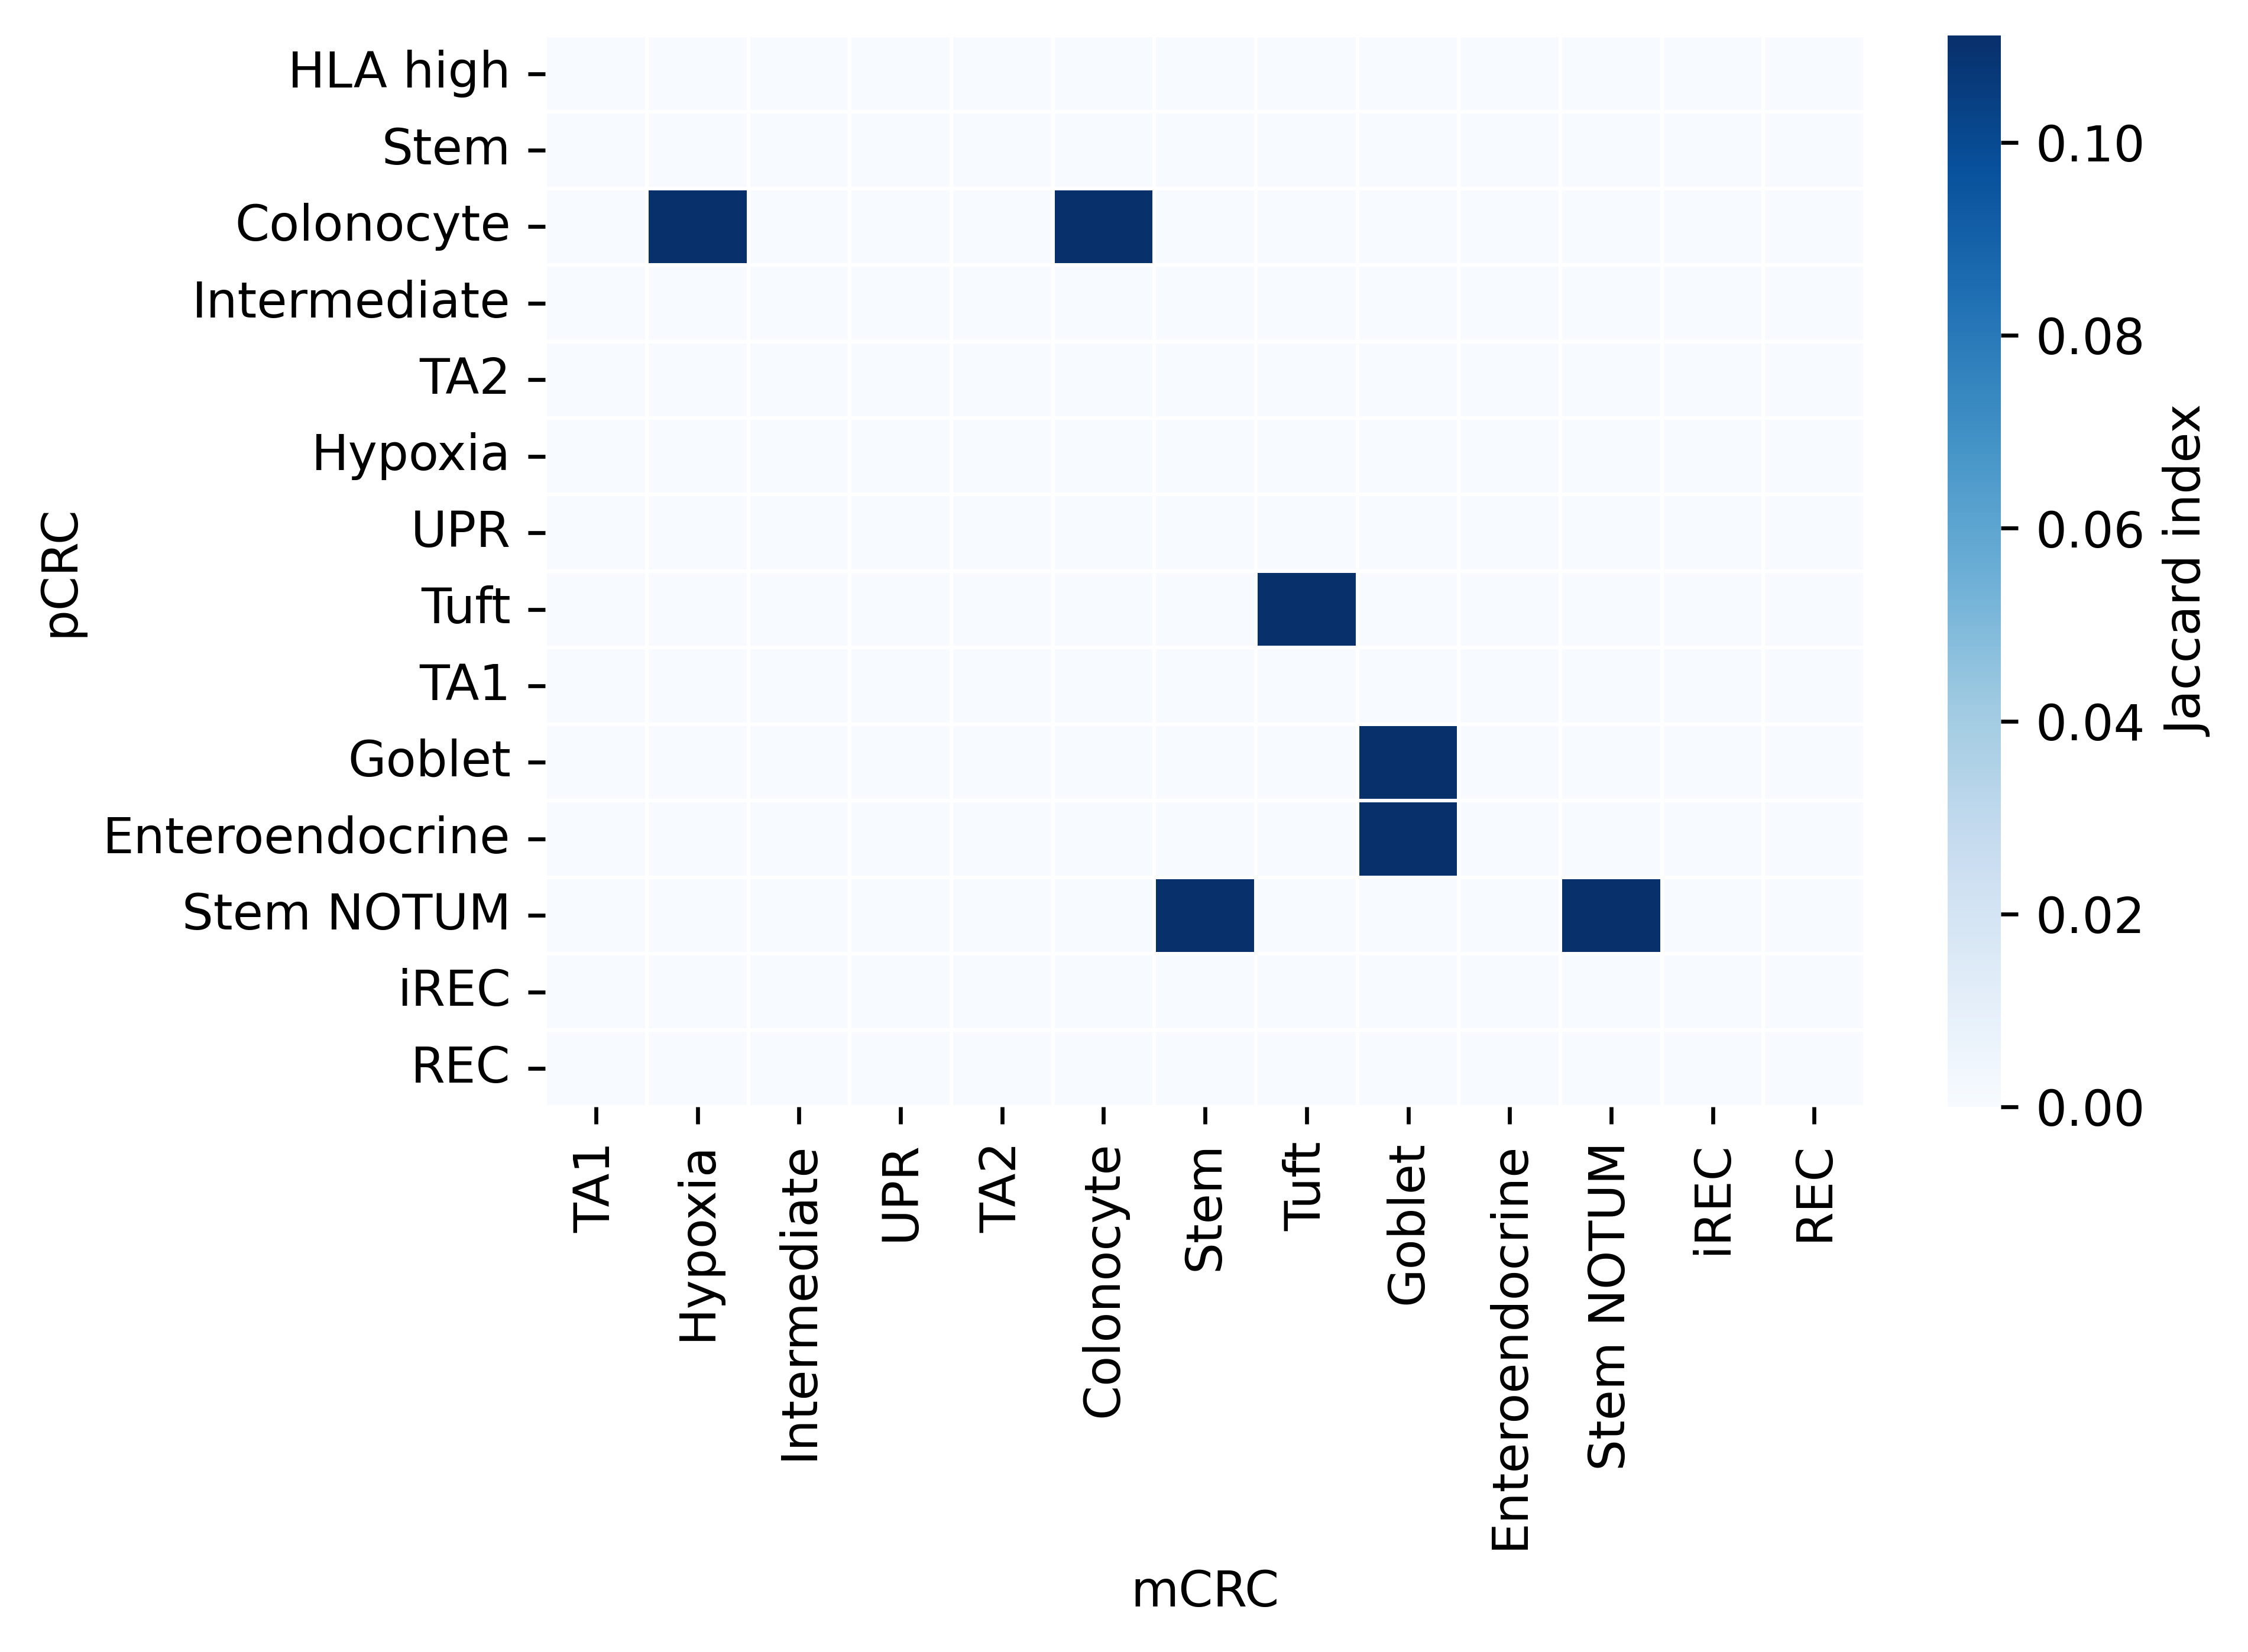

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=DPI)

sns.heatmap(data=jacc_idx_df,
            cmap='Blues',
            robust=True,
            cbar_kws={'label': 'Jaccard index'}, 
            linewidths=.5,
            ax=ax
           )
ax.set_ylabel('pCRC')
ax.set_xlabel('mCRC')

fig.savefig(FIG2SAVE.joinpath(f"Jaccard_index_{pop_tme}_{genes2consider}_DE_genes_per_subpop.pdf"), 
            dpi=DPI, 
            format="pdf",
            bbox_inches="tight")

In [57]:
FIG2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/final_object/figures/forpaper/Similarity_JaccardIndex')